# Ordinary Differential Equation

Marcos Duarte

An ordinary differential equation (ODE) is an equation containing a function of one independent variable and its derivatives.  

Solve an ODE is finding such a function whose derivatives satisfy the equation. The order of an ODE refers to the order of the derivatives; e.g., a first order ODE has only first derivatives. A linear ODE has only linear terms for the function of one independent variable and in general its solution can be obtained analytically. By contrast, a nonlinear ODE doesn't have an exact analytical solution and it has to be solved by numerical methods. The equation is referred as partial differential equation when contains a function of more than one independent variable and its derivatives.  

A simple and well known example of ODE is Newton's second law of motion:

$$ m\frac{\mathrm{d}^2 \mathbf{x}}{\mathrm{d}t^2}(t) = \mathbf{F} $$

$\mathbf{x}$ is the function with a derivative and $t$ is the independent variable. Note that the force, $\mathbf{F}$, can be constant (e.g., the gravitational force) or a function of position, $\mathbf{F}(\mathbf{x}(t))$, (e.g., the force of a spring) or a function of other quantity. If $\mathbf{F}$ is constant or a linear function of $\mathbf{x}$, this equation is a second-order linear ODE. 

## First-order ODE

A first-order ODE has the general form:

$$ \frac{\mathrm{d} y}{\mathrm{d} x} = f(x, y) $$

Where $f(x, y)$ is an expression for the derivative of $y$ that can be evaluated given $x$ and $y$. When $f(x, y)$ is linear w.r.t. $y$, the equation is a first-order linear ODE which can be written in the form:

$$ \frac{\mathrm{d} y}{\mathrm{d} x} + P(x)y = Q(x) $$


## Numerical methods for solving ODE

When an ODE can't be solved analytically, usually because it's nonlinear, numerical methods are used, a procedure also referred as numerical integration. In numerical methods, a first-order differential equation can be solved as an Initial Value Problem (IVP) of the form:  

$$ \dot{y}(t) = f(t, y(t)), \quad y(t_0) = y_0 $$

In numerical methods, a higher-order ODE is usually transformed into a system of first-order ODE and then this system is solved using numerical integration. 

### Euler method

The most simple method to solve an ODE is using the Euler method.  
First, the derivative of $y$ is approximated by:

$$ \dot{y}(t) \approx \frac{y(t+h)-y(t)}{h} $$

Where $h$ is the step size.  
Rearraning the equation above:

$$ y(t+h) \approx y(t) +h\dot{y}(t) $$

And replacing $\dot{y}(t)$:

$$ y(t+h) \approx y(t) +hf(t, y(t)) $$  

The ODE then can be solved starting at $t_0$, which has a known value for $y_0$:

$$ y(t+h) \approx y_0 + hf(t_0, y_0) $$ 

And using the equation recursively for a sequence of values for $t$ $(t_0, t_0+h, t_0+2h, ...)$:

$$ y_{n+1} = y_n + hf(t_n, y_n) $$ 

This is the Euler method to solve an ODE with a known initial value. 

### Other numerical methods for solving ODE
There are other methods for solving an ODE. One family of methods, usually more accurate, uses more points in the interval $[t_n,t_{n+1}]$ and are known as [Runge–Kutta methods](http://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_method). In the Python ecosystem, Runge–Kutta methods are available using the [`scipy.integrate.ode`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.ode.html) library of numeric integrators. The library [`scipy.integrate.odeint`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) has other popular integrator known as `lsoda`, from the FORTRAN library odepack.

## Examples

### Motion under constant force

Consider a football ball kicked up from an initial height $y_0$ and with initial velocity $v_0$. Determine the equation of motion of the ball.  

Neglecting the air resistance, Newton's second law of motion applied to this problem for the instants the ball is in the air gives: 

$$ m\frac{\mathrm{d}^2 y}{\mathrm{d}t^2} = -mg $$

Consider $g=9.8m/s^2$, $y_0(t=0)=1m$, and $v_0(t=0)=20m/s$.

We know the analytical solution for this problem:

$$ y(t) = y_0 + v_0 t - \frac{g}{2}t^2 $$

Let's solve this problem numerically and compare the results.

A second-order ODE can be transformed into two first-order ODE, introducing a new variable:

$$ \dot{y} = v $$
$$ \dot{v} = a $$

And rewriting Newton's second law as a couple of equations:

$$ \left\{
\begin{array}{r}
\frac{\mathrm{d} y}{\mathrm{d}t} = &v, \quad y(0) = y_0
\\
\frac{\mathrm{d} v}{\mathrm{d}t} = &-g, \quad v(0) = v_0
\end{array}
\right.$$

First, let's import the necessary Python libraries and customize the environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib nbagg 
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rc('axes', grid=False, labelsize=14, titlesize=16, ymargin=0.05)
matplotlib.rc('legend', numpoints=1, fontsize=11)

This is the equation for calculating the ball trajectory given the model and using the Euler method:

In [2]:
def ball_euler(t0, tend, y0, v0, h):
    
    t, y, v, i = [t0], [y0], [v0], 0
    a = -9.8  
    
    while t[-1] <= tend and y[-1] > 0:
        y.append(y[-1] + h*v[-1])
        v.append(v[-1] + h*a)
        i += 1
        t.append(i*h)
        
    return np.array(t), np.array(y), np.array(v)

Initial values:

In [3]:
y0 = 1
v0 = 20

a = -9.8

Let's call the function with different step sizes:

In [4]:
t100, y100, v100 = ball_euler(0, 10, y0, v0, 0.1)
t10, y10, v10    = ball_euler(0, 10, y0, v0, 0.01)

Here are the plots for the results:

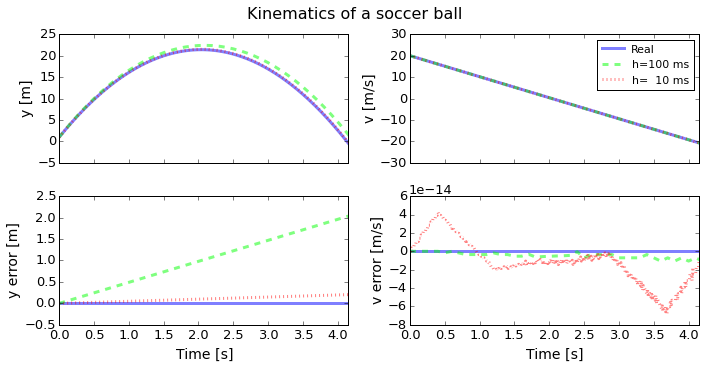

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 5))

axs[0, 0].plot(t10, y0 + v0*t10 + 0.5*a*t10**2, color=[0, 0, 1, .5], label='Real')
axs[0, 0].plot(t100, y100, '--', color=[0, 1, 0, .5], label='h=100 ms')
axs[0, 0].plot(t10, y10, ':', color=[1, 0, 0, .5], label='h=  10 ms')

axs[0, 1].plot(t10, v0 + a*t10, color=[0, 0, 1, .5], label='Real')
axs[0, 1].plot(t100, v100, '--', color=[0, 1, 0, .5], label='h=100 ms')
axs[0, 1].plot(t10, v10, ':', color=[1, 0, 0, .5], label='h=  10 ms')

axs[1, 0].plot(t10, y0 + v0*t10 + 0.5*a*t10**2 - (y0 + v0*t10 + 0.5*a*t10**2),
               color=[0, 0, 1, .5], label='Real')
axs[1, 0].plot(t100, y100 - (y0 + v0*t100 + 0.5*a*t100**2), '--',
               color=[0, 1, 0, .5], label='h=100 ms')
axs[1, 0].plot(t10, y10 - (y0 + v0*t10 + 0.5*a*t10**2), ':',
               color=[1, 0, 0, .5], label='h=100 ms')

axs[1, 1].plot(t10, v0 + a*t10 - (v0 + a*t10), color=[0, 0, 1, .5], label='Real')
axs[1, 1].plot(t100, v100 - (v0 + a*t100), '--', color=[0, 1, 0, .5], label='h=100 ms')
axs[1, 1].plot(t10, v10 - (v0 + a*t10), ':', color=[1, 0, 0, .5], label='h=  10 ms')

ylabel = ['y [m]', 'v [m/s]', 'y error [m]', 'v error [m/s]']
axs[0, 0].set_xlim(t10[0], t10[-1])
axs[1, 0].set_xlabel('Time [s]')
axs[1, 1].set_xlabel('Time [s]')
axs[0, 1].legend()
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.set_ylabel(ylabel[i])
plt.suptitle('Kinematics of a soccer ball', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Let's use the integrator `lsoda` to solve the same problem:

In [6]:
from scipy.integrate import odeint, ode

def ball_eq(yv, t):
    
    y = yv[0]  # position 
    v = yv[1]  # velocity
    a = -9.8   # acceleration
    
    return [v, a]

In [7]:
yv0   = [1, 20]
t10   = np.arange(0, 4, 0.1)
yv10  = odeint(ball_eq, yv0, t10)
t100  = np.arange(0, 4, 0.01)
yv100 = odeint(ball_eq, yv0, t100)

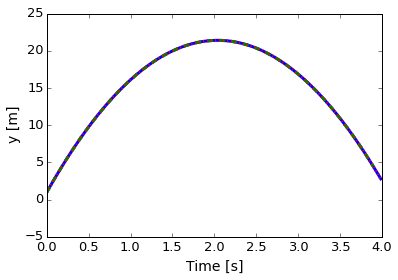

In [8]:
plt.plot(t100, yv0[0] + yv0[1]*t100 + 0.5*-9.8*t100**2)
plt.plot(t10,  yv10[:, 0], '--')
plt.plot(t100, yv100[:, 0], ':')
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.show()

Let's use an explicit runge-kutta method of order (4)5 due to Dormand and Prince (a.k.a. ode45 in Matlab):

In [9]:
def ball_eq(t, yv):
    
    y = yv[0]  # position 
    v = yv[1]  # velocity
    a = -9.8   # acceleration
    
    return [v, a]

### Motion under varying force

Let's consider the air resistance in the calculations for the vertical trajectory of the football ball. According to the Laws of the Game from FIFA, the ball is spherical, has a circumference of 0.69m, and a mass of 0.43kg.  
We will model the drag force due to the air resistance by:

$$ F_d(v) = -\frac{1}{2}\rho C_d A v^2 $$

Where $\rho$ is the air density, $A$ the ball cross sectional area, and $C_d$ the drag coefficient, which for now we will consider constant with a value between 0.25 and 0.30 (Bray and Kerwin, 2003).  
Applying Newton's second law of motion to the new problem:

$$ m\frac{\mathrm{d}^2 y}{\mathrm{d}t^2} = -mg -\frac{1}{2}\rho C_d A v^2 $$

And as a couple of first order equations:

$$ \left\{
\begin{array}{l l}
\frac{\mathrm{d} y}{\mathrm{d}t} = &v, \quad &y(0) = y_0
\\
\frac{\mathrm{d} v}{\mathrm{d}t} = &-g -\frac{1}{2m}\rho C_d A v^2, \quad &v(0) = v_0
\end{array}
\right.$$

Let's write a function for this equation:

In [10]:
def ball_euler(t0, tend, y0, v0, h):
    
    t, y, v, i = [t0], [y0], [v0], 0
    a = -9.8       # m/s2
    m = 0.43       # kg
    rho = 1.225    # kg/m3
    cd = 0.25      # dimensionless
    A = 0.0378868  # m2
    
    while t[-1] <= tend and y[-1] > 0:
        v.append(v[-1] + h*(-a - 1/(2*m)*rho*cd*A*v[-1]**2))
        y.append(y[-1] + h*v[-1])
        i += 1
        t.append(i*h)
        
    return np.array(t), np.array(y), np.array(v)

to be continued...

## References

- Downey AB (2011) [Physical Modeling in MATLAB](http://greenteapress.com/matlab/). Green Tea Press. 